### Итоговая по Python

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 1.Загрузите файл HR.csv в pandas dataframe

In [210]:
df= pd.read_csv('HR.csv', sep = ',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [212]:
# Посмотрим характеристики категорийных признаков
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [213]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [214]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [215]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [216]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

#### 2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [217]:
df_q = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
df_q.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [218]:
# Дополнительно выведем моду
print(f'satisfaction_level mode -  {df_q.satisfaction_level.mode()[0]}')
print(f'last_evaluation mode -  {df_q.last_evaluation.mode()[0]}')
print(f'number_project mode -  {df_q.number_project.mode()[0]}')
print('average_montly_hours mode')
print(df_q.average_montly_hours.mode())
print(f'time_spend_company mode -  {df_q.time_spend_company.mode()[0]}')

satisfaction_level mode -  0.1
last_evaluation mode -  0.55
number_project mode -  4
average_montly_hours mode
0    135
1    156
dtype: int64
time_spend_company mode -  3


#### 3.Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [219]:
df_q.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


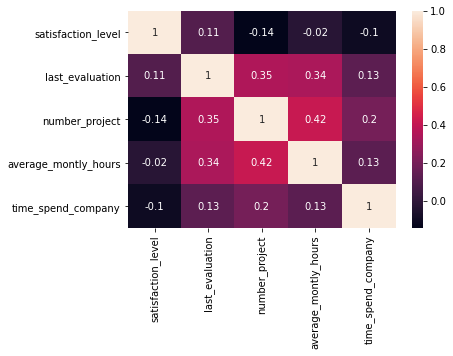

In [220]:
sns.heatmap(df_q.corr(), annot = True)

Наиболее скореллированные переменные: number_project и average_montly_hours с коэффициентом 0,42.  
Наимение скореллированные переменные: satisfaction_level и average_montly_hours с коэффициентом -0,02    

#### 4.Рассчитайте сколько сотрудников работает в каждом департаменте.

In [221]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#### 5.Показать распределение сотрудников по зарплатам.

In [222]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#### 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [223]:
df.pivot_table(index='department', columns = 'salary', values = 'left', aggfunc = 'count')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


#### 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [224]:
df_high = df[df['salary']=='high']
df_high.shape

(1237, 10)

In [225]:
df_low = df[df['salary']=='low']
df_low.shape

(7316, 10)

H0: среднее время проведенное на работе сотрудников с высоким и низким окладом одинаковое  
H1: среднее время проведенное на работе сотрудников с высоким и низким окладом не одинаковое

In [226]:
alpha = 0.05
result = st.ttest_ind(df_low['average_montly_hours'], df_high['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


Вывод: нет статистически значимых различий в среднем времени, которое сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе. Следовательно, гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, не подтвердилась. 

#### 8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет  
- Средняя степень удовлетворенности  
- Cреднее количество проектов

In [227]:
df_left = df[df['left']==1]
df_left.shape

(3571, 10)

In [228]:
df_work = df[df['left']==0]
df_work.shape

(11428, 10)

#### Среди работающих

In [229]:
prom = len(df_work[df_work['promotion_last_5years']==1])/len(df_work)
print(f'Доля сотрудников с повышением за последние 5 лет - {prom:.2f}%')
print(f'Средняя степень удовлетворенности - {df_work.satisfaction_level.mean():.2f}')
print(f'Cреднее количество проектов - {df_work.number_project.mean():.0f}')

Доля сотрудников с повышением за последние 5 лет - 0.03%
Средняя степень удовлетворенности - 0.67
Cреднее количество проектов - 4


#### Среди уволившихся

In [230]:
# Среди уволившихся
prom = len(df_left[df_left['promotion_last_5years']==1])/len(df_left)
print(f'Доля сотрудников с повышением за последние 5 лет - {prom:.2f}%')
print(f'Средняя степень удовлетворенности - {df_left.satisfaction_level.mean():.2f}')
print(f'Cреднее количество проектов - {df_left.number_project.mean():.0f}')

Доля сотрудников с повышением за последние 5 лет - 0.01%
Средняя степень удовлетворенности - 0.44
Cреднее количество проектов - 4


#### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.

In [231]:
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident', 'promotion_last_5years',]]
y = df[['left']]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [233]:
X_train.shape

(11249, 7)

In [234]:
y_train.shape

(11249, 1)

In [235]:
lda = LinearDiscriminantAnalysis()

In [236]:
lda.fit(X_train,y_train)

C:\Users\orlovanv\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [237]:
lda.coef_

array([[-4.51500753,  0.5541958 , -0.22098577,  0.00471186,  0.2206656 ,
        -1.10597425, -1.07961817]])

In [238]:
predict = lda.predict(X_test)

In [239]:
lda_accuracy = accuracy_score(y_test, predict)
print(f'Точность модели {lda_accuracy:.3f}')

Точность модели 0.763
